# Colab
https://colab.research.google.com/drive/1J1dG-aUE47dwFdpmAzm8BnWIMFwuZ8p6?usp=sharing

0.18


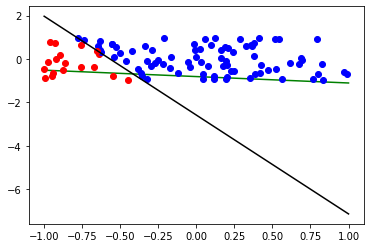

<Figure size 432x288 with 0 Axes>

In [3]:
!pip install numpy
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from IPython import display

# Implementação do perceptron
class perceptron(object):

    # tol é um limiar para parar 
    def __init__(self, lrate = 1, w=None, maxiter=3, tol = 0, plot_= False):
        self.lrate = lrate
        self.maxiter = maxiter
        self.tol = tol
        self.plot_ = plot_
        self.w = w # peso

    # atualiza pesos
    def __update_w(self, X_train, y_train):
        for xi, yi in zip(X_train, y_train):
            if int(np.sign(np.dot(xi, self.w.T))) != int(yi):
                self.w += (xi.T * self.lrate)*yi

    def __eval_perceptron(self, X_train, y_train):
        error = 0
        miss_indx = []
        for xi, yi, i in zip(X_train, y_train, range(len(y_train))):
            # multiplica entrada com pesos
            # verifica se coincide com o esperado então computa erros
            if int(np.sign(np.dot(xi, self.w.T))) != int(yi):
                error += 1
        return error

    def _plot(self, X, y, true_w=None):
        a, b = -self.w[1]/self.w[2], -self.w[0]/self.w[2] 
        l = np.linspace(-1,1)
        plt.plot(l, a*l+b, 'green')
        cols = {1: 'r', -1: 'b'}

        for x,s in zip(X, y):
            plt.plot(x[0], x[1], cols[s]+'o')

        if not true_w is None:
            a, b = -true_w[1]/true_w[2], -true_w[0]/true_w[2] 
            plt.plot(l, a*l+b, '-k')
        plt.show()
        plt.clf()
        display.display(plt.gcf())
        display.clear_output(wait=True)
        plt.clf() # limpa a imagem do gráfico
    
    def fit(self, X_train, y_train):
        X_train = np.array(X_train)
        X_train = np.insert(X_train, 0, 1, 1) # adiciona vies
        y_train = np.array(y_train)

        if self.w is None:
            # se não tiver peso será definido
            self.w = np.random.normal(0, 10, len(X_train[0]))
        count = 0
        
        # loop  infinito
        while True: 
            error = self.__eval_perceptron(X_train, y_train)
            self.__update_w(X_train, y_train) # atualiza peso

            count += 1
            if error < self.tol or count > self.maxiter:
                break

            if self.plot_:
                self._plot(X_train[:, 1:], y_train)

    def predict(self, X_test):
        X_test = np.insert(X_test, 0, 1, 1)
        return np.sign(np.dot(X_test, self.w.T))

if __name__ == '__main__':
    # gera dados linearmente separáveis em 2D e os dados são randômicos
    x1,y1,x2,y2 = [np.random.uniform(-1, 1) for i in range(4)] # define 2 pontos
    w_target = np.array([x2*y1-x1*y2, y2-y1, x1-x2]) # gera vetor
    a, b = -w_target[1]/w_target[2], -w_target[0]/w_target[2] # para desenhar

    X = np.random.uniform(-1, 1, (100, 2)) # gera 100 pontos 
    y = np.sign(np.dot(np.insert(X, 0, 1, 1), w_target.T)) # gera targets

    # usa perceptron para separar os dados
    clf = perceptron(maxiter=10, lrate = 0.1, plot_ = True)
    clf.fit(X, y)
    pred = clf.predict(X)
    print(sum(pred != y)/len(y)) # proporção de acertos

    # mostra resultados
    clf._plot(X, y, true_w = w_target)
    
%matplotlib notebook   

In [4]:
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings as warn
warn.filterwarnings('ignore')

iris = datasets.load_iris()
XIris = iris.data
yIris = iris.target
X_train, X_test, y_train, y_test = train_test_split(XIris, yIris, test_size = 0.2)


clf = perceptron(maxiter=100, lrate = 0.1, plot_ = False)
clf.fit(X_train, y_train) # treino
pred = clf.predict(X_test) # predição  e guarda o valor na variável pred
    
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0 11  0]
 [ 0 10  0]
 [ 0  9  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.33      1.00      0.50        10
           2       0.00      0.00      0.00         9

    accuracy                           0.33        30
   macro avg       0.11      0.33      0.17        30
weighted avg       0.11      0.33      0.17        30



In [26]:
#Perceptron para sklearn

# fase 1
# importando as bibliotecas
from sklearn.linear_model import Perceptron
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
# fase 2
# instanciar um modelo e neste caso é Perceptron
# perceptronSklearn é uma variável que é um objeto
perceptronSklearn = Perceptron(random_state=120, max_iter=1000, alpha=0.01)

# obter dados
datasetIris = datasets.load_iris()
entrada_iris = datasetIris.data
saida_iris = datasetIris.target

# fase divisão treino e teste
#X_train  valores de entrada do treinamento
#X_test valores entrada de teste
#y_train saída/target do treinamento
#y_test saída/target de teste
X_train, X_test, y_train, y_test = train_test_split(entrada_iris, saida_iris, test_size=0.3, random_state=741)

# parte do treinamento
# usando dados de treinamento para treinar o perceptron implementado pela biblioteca sklearn
perceptronSklearn.fit(X_train, y_train)

# para poder realizar a predição  usaremos as entradas de teste
predicoes = perceptronSklearn.predict(X_test)

# vamos avaliar o resultado
print(classification_report(y_test, predicoes))
print(confusion_matrix(y_test, predicoes))

print(y_train)


              precision    recall  f1-score   support

           0       0.71      1.00      0.83        12
           1       1.00      0.44      0.61        16
           2       0.81      1.00      0.89        17

    accuracy                           0.80        45
   macro avg       0.84      0.81      0.78        45
weighted avg       0.85      0.80      0.78        45

[[12  0  0]
 [ 5  7  4]
 [ 0  0 17]]
[2 0 1 1 1 2 1 0 0 0 2 1 1 0 0 1 2 0 1 0 1 0 0 1 2 2 0 2 1 0 2 0 0 0 0 2 2
 1 0 1 1 0 0 0 2 2 0 0 2 2 1 0 2 1 2 2 2 2 1 0 1 2 2 2 0 2 2 1 2 2 1 0 0 2
 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 2 0 2 0 2 2 1 2 0 0 1 1 2 1 0]


In [29]:
#linear
import numpy as np

def funcaoAtivacaoLinear(soma):
  return soma

resultadoFuncaoLinear = funcaoAtivacaoLinear(5000)

print('resultado ', resultadoFuncaoLinear)

resultado  5000


In [33]:
# softmax

import numpy as np

def funcaoAtivacaoSoftmax(lista):
  ex = np.exp(lista)
  return ex / ex.sum()

valores = [7.0, 2.0, 1.3]

resultadoFuncaoAtivacaoSoftmax = funcaoAtivacaoSoftmax(valores)

print(valores)
print(resultadoFuncaoAtivacaoSoftmax)

[7.0, 2.0, 1.3]
[0.99001676 0.00667068 0.00331256]


In [38]:
# step function

import numpy as np

def funcaoAtivacaoStepFunction(soma):
  if (soma >= 1):
    return 1
  return 0

resultadoFuncaoAtivacaoStepFunction = funcaoAtivacaoStepFunction(5000)

print(resultadoFuncaoAtivacaoStepFunction)

1


In [42]:
# sigmoid

import numpy as np

def funcaoAtivacaoSigmoid(soma):
  return 1 / (1+np.exp(-soma))

resultadoFuncaoAtivacaoSigmoid = funcaoAtivacaoSigmoid(-0.35)

print(resultadoFuncaoAtivacaoSigmoid)

0.41338242108267


In [51]:
# tangente hiperbólica

import numpy as np

def funcaoAtivacaoAtivacaoTangenteHiperbolica(soma):
  return (np.exp(soma)-np.exp(-soma))/ (np.exp(soma)+np.exp(-soma))

resultadoTah = funcaoAtivacaoAtivacaoTangenteHiperbolica(-0.3123)

print(resultadoTah)

-0.3025280449710527


In [52]:
import numpy as np

def relu(soma):
  if(soma>=0):
    return soma
  return 0

resultadoRelu =  relu(0.359)

print(resultadoRelu)

0.359
